By: Makson Vinicio
<i>Follow me:</i><br>

<a href="https://www.linkedin.com/in/maksonvinicio/" target="_blank"><img src="https://img.shields.io/badge/LinkedIn-%230077B5.svg?&style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn"></a>
<a href="https://www.instagram.com/maksonvinicio/?hl=pt-br" target="_blank"><img src="https://img.shields.io/badge/Instagram-%23E4405F.svg?&style=flat-square&logo=instagram&logoColor=white" alt="Instagram"></a>
<a href="https://www.facebook.com/Makson.Vinicio.10/" target="_blank"><img src="https://img.shields.io/badge/Facebook-%231877F2.svg?&style=flat-square&logo=facebook&logoColor=white" alt="Facebook"></a>
<a href="https://github.com/maksonviini" target="_blank"><img src="https://img.shields.io/badge/GitHub-maksonviini-black" alt="GitHub"></a>


# Introdução

### **Pycaret** uma lib de AutoML para facilitar a sua vida.

Pycaret e uma biblioteca open-source que traz como lema o “low-code”, que tem como proposta a criação e avaliação de modelos de machine learning em poucos minutos, trazendo facilidade e velocidade, principalmente por já trabalhar com alguns algoritmos do próprio sklearn que tem implementados a possibilidade de paralelismo. Picareta também ajuda na tunagem do seu modelo, encontrando os melhores parâmetros para te entregar o melhor modelo possível para uso, seja ele para regressão, classificação, ou séries temporais que foram recentemente inseridos.

<img src = 'image/pycaret.png'>

Pycaret também oferece possibilidades de transformação de dados, como One Hot Esconder, e Label Enconder, junto de uma facilidade para fazer deploy diretamente em cloud, como a AWS.

Nesta análise vamos trabalhar com um problema de negócio muito recorrente no mercado, a de classificação de usuário para a concessão de crédito.

# Table of contents
[1. Loading and preparing data](#1.-Loading-and-preparing-data)

[2. Descriptive Statistics](#2.-Descriptive-Statistics)

[3. Create Model](#3.-Create-Model)

[4. Comparing All Models](#-4.-Comparing-All-Models)

[5. Some Models](#5.-Some-Models)

[6. Tune Models](#-6.-Tune-Models)

[7. Plot Best Model](#7.-Plot-Best-Model)

[8. Finalize Model](#8.-Finalize-Model)

Para inicio, vamos comecar importando o pycaret para classificação.

# 1. Loading and preparing data

In [2]:
# Pycaret para classificação
from pycaret.classification import *

# Dados oferecidos pelo proprio Pycaret
from pycaret.datasets import get_data   

# Matlplotlib e seaborn para plotar graficos
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [8]:
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [9]:
print("Quantidade de linhas: ", data.shape[0])
print("Quantidade de colunas: ", data.shape[1])

Quantidade de linhas:  24000
Quantidade de colunas:  24


# 2. Descriptive Statistics


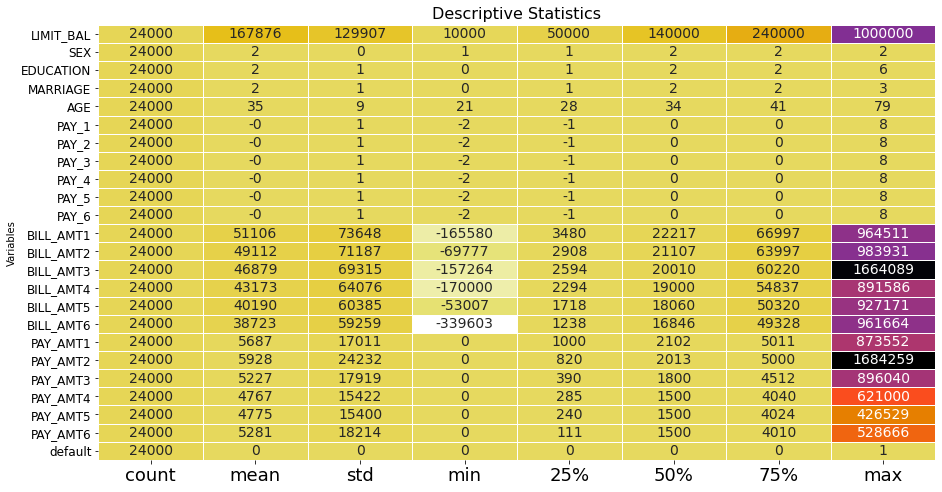

In [10]:
desc = data.describe().T

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(desc, annot=True, cmap='CMRmap_r', fmt='.00f', 
            ax=ax, linewidths=1, cbar=False,
            annot_kws={'size': 14})
plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

### Missing values analysis

In [14]:
# Porcetagem dos dados faltantes
(data.isna().sum() / data.shape[0]).sort_values(ascending=False)

LIMIT_BAL    0.0
SEX          0.0
PAY_AMT6     0.0
PAY_AMT5     0.0
PAY_AMT4     0.0
PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT6    0.0
BILL_AMT5    0.0
BILL_AMT4    0.0
BILL_AMT3    0.0
BILL_AMT2    0.0
BILL_AMT1    0.0
PAY_6        0.0
PAY_5        0.0
PAY_4        0.0
PAY_3        0.0
PAY_2        0.0
PAY_1        0.0
AGE          0.0
MARRIAGE     0.0
EDUCATION    0.0
default      0.0
dtype: float64

In [9]:
# Informações dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

Nós temos um dataset bem simples de ser trabalhado, com todas as colunas como numéricas, sendo float e int, e sem nenhum dado faltante.

# 3. Create Model


Para começar o processo de criação do modelo é bem simples, com a função setup, você só precisa passar os dados, a variável alvo, e se preferir pode passar uma divisão dos dados para teste com *test_size*.

In [3]:
setup = setup(data=data, target='default', session_id=42)

,Description,Value
0,session_id,42
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(24000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


# 4. Comparing All Models


O próximo passo é onde o Pycaret brilha, na comparação dos modelos, fazendo o **AutoML**, ele treina vários modelos já com a divisão cruzada dos dados que por padrão e 10 folds, e retorna uma média junto da acurácia de cada treino dos folds, ótimo para saber se o modelo está realmente balanceado e nao esta dando *overfitting* ou dando *underfitting*.

In [12]:
best_model = compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:50:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8198,0.0000,0.3571,0.6853,0.4688,0.3731,0.4022,0.0450
gbc,Gradient Boosting Classifier,0.8195,0.7797,0.3645,0.6779,0.4731,0.3761,0.4029,1.6530
lda,Linear Discriminant Analysis,0.8194,0.7620,0.3723,0.6729,0.4786,0.3803,0.4050,0.2810
ada,Ada Boost Classifier,0.8159,0.7729,0.3325,0.6797,0.4456,0.3506,0.3833,0.4000
rf,Random Forest Classifier,0.8135,0.7617,0.3709,0.6423,0.4696,0.3663,0.3870,0.8830
et,Extra Trees Classifier,0.8038,0.7390,0.3771,0.5957,0.4611,0.3487,0.3626,0.9020
lr,Logistic Regression,0.7769,0.6431,0.0000,0.0000,0.0000,-0.0001,-0.0013,0.9170
knn,K Neighbors Classifier,0.7464,0.5997,0.1777,0.3605,0.2376,0.1065,0.1161,0.4380
dt,Decision Tree Classifier,0.7234,0.6174,0.4259,0.3900,0.4070,0.2271,0.2276,0.1340
svm,SVM - Linear Kernel,0.7091,0.0000,0.1553,0.1363,0.1220,0.0195,0.0216,0.2750


In [ ]:
print(best_model)

# 5. Some Models


### E após efetuar a análise dos melhores modelos, basta escolher um para treinar, nesta análise vamos escolher três modelos, knn, random forest, e o Ridge. Para efetuar o treinamento do modelo, basta utilizar a função *create_model* e passar o pronome do modelo como string por parâmetro, e ele realizará o *fitting*.

## 5.1 Ridge Classifier

In [4]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8310,0.0000,0.3663,0.7446,0.4910,0.4035,0.4400
1,0.8119,0.0000,0.3075,0.6686,0.4212,0.3268,0.3621
2,0.8220,0.0000,0.3653,0.6919,0.4782,0.3830,0.4114
3,0.8363,0.0000,0.3867,0.7632,0.5133,0.4273,0.4630
4,0.8161,0.0000,0.3573,0.6634,0.4645,0.3653,0.3908
5,0.8149,0.0000,0.3467,0.6633,0.4553,0.3568,0.3841
6,0.8143,0.0000,0.3787,0.6425,0.4765,0.3727,0.3919
7,0.8226,0.0000,0.3973,0.6742,0.5000,0.4008,0.4215
8,0.8077,0.0000,0.3360,0.6300,0.4383,0.3350,0.3591
9,0.8207,0.0000,0.3289,0.7110,0.4497,0.3595,0.3977


In [5]:
print(ridge)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)


## 5.2 K Neighbors Classifier

In [6]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7524,0.6245,0.1658,0.3735,0.2296,0.1075,0.1201
1,0.7500,0.5810,0.1658,0.3647,0.2279,0.1032,0.1146
2,0.7548,0.6176,0.2080,0.4041,0.2746,0.1449,0.1565
3,0.7458,0.5981,0.1867,0.3646,0.2469,0.1128,0.1220
4,0.7500,0.5969,0.1493,0.3567,0.2105,0.0907,0.1029
5,0.7411,0.5918,0.1787,0.3454,0.2355,0.0982,0.1060
6,0.7387,0.6064,0.1787,0.3384,0.2339,0.0941,0.1011
7,0.7494,0.6146,0.2160,0.3894,0.2779,0.1411,0.1500
8,0.7393,0.5964,0.1867,0.3448,0.2422,0.1013,0.1083
9,0.7427,0.5701,0.1417,0.3232,0.1970,0.0708,0.0794


In [7]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


## 5.3 Random Forest Classifier

In [8]:
clf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8208,0.7860,0.3717,0.6780,0.4801,0.3829,0.4081
1,0.8077,0.7416,0.3155,0.6378,0.4222,0.3223,0.3511
2,0.8125,0.7789,0.3707,0.6376,0.4688,0.3645,0.3843
3,0.8232,0.7758,0.3947,0.6789,0.4992,0.4008,0.4226
4,0.8101,0.7589,0.3440,0.6386,0.4471,0.3447,0.3688
5,0.8107,0.7598,0.3707,0.6290,0.4664,0.3606,0.3792
6,0.8083,0.7485,0.3840,0.6128,0.4721,0.3625,0.3773
7,0.8220,0.7666,0.4293,0.6545,0.5185,0.4151,0.4290
8,0.8042,0.7572,0.3707,0.5991,0.4580,0.3465,0.3614
9,0.8154,0.7437,0.3583,0.6569,0.4637,0.3636,0.3880


In [9]:
print(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


# 6. Tune Models


### O processo de tunagem para descobrir os melhores hyperparâmetros se dá pela função *tune_model*, e só precisa passar o modelo treinado antes como parâmetro, simples assim, e você já tera um modelo treinado prontinho.

## 6.1 Ridge Classifier

In [10]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8310,0.0000,0.3663,0.7446,0.4910,0.4035,0.4400
1,0.8107,0.0000,0.2995,0.6667,0.4133,0.3193,0.3558
2,0.8232,0.0000,0.3707,0.6950,0.4835,0.3885,0.4165
3,0.8369,0.0000,0.3893,0.7644,0.5159,0.4300,0.4655
4,0.8155,0.0000,0.3573,0.6601,0.4637,0.3639,0.3890
5,0.8149,0.0000,0.3467,0.6633,0.4553,0.3568,0.3841
6,0.8143,0.0000,0.3787,0.6425,0.4765,0.3727,0.3919
7,0.8250,0.0000,0.4000,0.6849,0.5051,0.4075,0.4293
8,0.8077,0.0000,0.3360,0.6300,0.4383,0.3350,0.3591
9,0.8207,0.0000,0.3289,0.7110,0.4497,0.3595,0.3977


In [11]:
print(tuned_ridge)

RidgeClassifier(alpha=2.83, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=42, solver='auto',
                tol=0.001)


## 6.2 K Neighbors Classifier

In [12]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7851,0.6769,0.0588,0.7097,0.1086,0.0772,0.1605
1,0.7798,0.6343,0.0535,0.5556,0.0976,0.0608,0.1184
2,0.7839,0.6558,0.0880,0.6111,0.1538,0.1035,0.1698
3,0.7780,0.6577,0.0693,0.5200,0.1224,0.0737,0.1248
4,0.7756,0.6494,0.0560,0.4773,0.1002,0.0560,0.1001
5,0.7798,0.6530,0.0560,0.5676,0.1019,0.0644,0.1241
6,0.7768,0.6445,0.0640,0.5000,0.1135,0.0662,0.1140
7,0.7690,0.6583,0.0587,0.3860,0.1019,0.0456,0.0732
8,0.7798,0.6395,0.0667,0.5556,0.1190,0.0748,0.1324
9,0.7707,0.6234,0.0348,0.3514,0.0633,0.0241,0.0464


In [13]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=45, p=2,
                     weights='uniform')


## 6.3 Random Forest Classifier

In [15]:
tuned_clf = tune_model(clf, n_iter=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8262,0.8018,0.3503,0.7278,0.4729,0.3838,0.4206
1,0.8065,0.7666,0.2727,0.6581,0.3856,0.2935,0.3337
2,0.8226,0.8007,0.3627,0.6974,0.4772,0.3830,0.4127
3,0.8292,0.7950,0.3653,0.7366,0.4884,0.3995,0.4350
4,0.8149,0.7838,0.3333,0.6720,0.4456,0.3493,0.3803
5,0.8149,0.7786,0.3387,0.6684,0.4496,0.3523,0.3818
6,0.8137,0.7614,0.3600,0.6490,0.4631,0.3614,0.3844
7,0.8256,0.7776,0.4027,0.6864,0.5076,0.4102,0.4318
8,0.8101,0.7735,0.3413,0.6400,0.4452,0.3432,0.3679
9,0.8148,0.7562,0.3075,0.6886,0.4251,0.3335,0.3721


In [16]:
print(tuned_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


# 7. Plot Best Model


### O Pycaret é tão incrível e simples, que também nos possibilita toda a análise das métricas e curvas apenas com um *plot_model*, passando por parâmetro o modelo, e no parâmetro *plot*, a métrica que você quer avaliar, como no caso abaixo a curva AUC.

## 7.1 AUC Curve

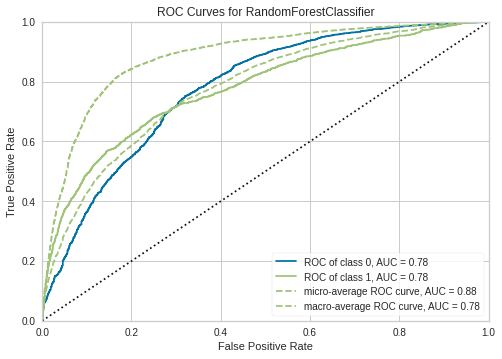

In [18]:
plot_model(tuned_clf, plot='auc')

## 7.2 Precision Recall Curve

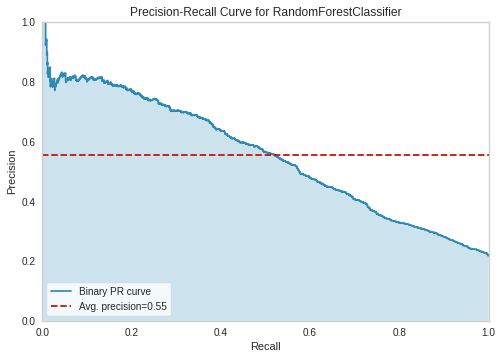

In [19]:
plot_model(tuned_clf, plot='pr')

## 7.3 Feature Importance Plot

Feature importance mostra qual a feature que mais mais explica o nosso modelo, qual mais influencia em sua decisão.

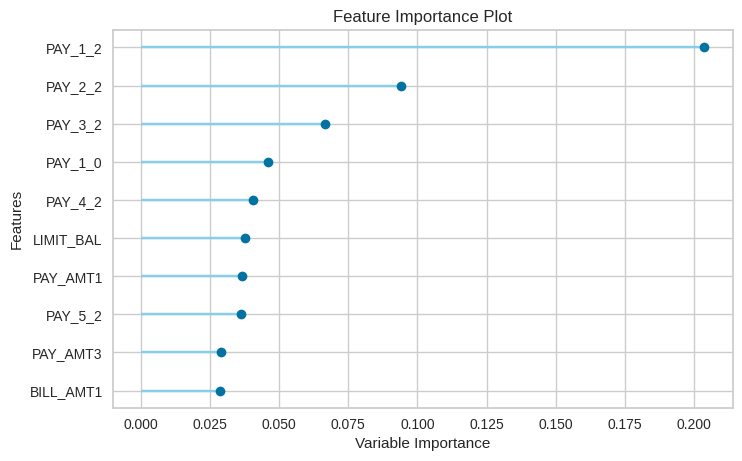

In [20]:
plot_model(tuned_clf, plot='feature')

## 7.4 Matrix Confusion

A matriz de confusão nos dá o resultado de quantos nosso modelo classificou corretamente, e quantos errados, sendo a diagonal principal os acertos.

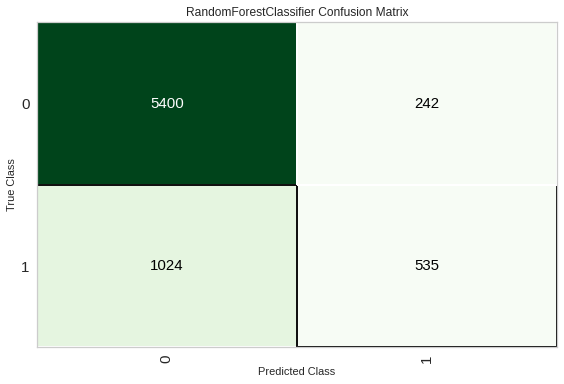

In [22]:
plot_model(tuned_clf, plot='confusion_matrix')

O *evaluate_model* nos da uma pagina iterativa para navegarmos entre as principais métricas e gráficos.


In [23]:
evaluate_model(tuned_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
predict_model(tuned_clf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8242,0.7776,0.3432,0.6885,0.4580,0.3669,0.3986


# 8. Finalize Model

Por fim, basta finalizar o modelo, e salvá-lo com **pickle**, e está pronto para produção, aí basta utilizar ferramentas como **streamlit** para criar sua página de previsão com o modelo, e fazer *deploy* em ambientes como **AWS**, ou **Heroku** que é grátis.

In [27]:
final_model = finalize_model(tuned_clf)

In [28]:
print(final_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
